In [ ]:
#Import library
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import SGD
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# pip install --upgrade tensorflow

In [ ]:
#Mengatur input gambar
IMAGE_SIZE = [224, 224]

In [ ]:
#Mount google drive
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#Buat direktori
base_dir = '/content/drive/MyDrive/SKRIPSI'
!ls '/content/drive/MyDrive/SKRIPSI'


data  train  validasi


In [ ]:
#menentukan direktorinya
data_dir = os.path.join(base_dir, 'data')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validasi')

In [ ]:
mild_dir = os.path.join(data_dir, 'mild/')
moderate_dir = os.path.join(data_dir, 'moderate/')
no_DR_dir = os.path.join(data_dir, 'no_DR/')
proliferative_dir = os.path.join(data_dir, 'proliferative')
severe_dir = os.path.join(data_dir, 'severe')

print("Jumlah Data Latih di Tiap Kelas")
print("Jumlah Gambar  mild            = ", len(os.listdir(mild_dir)))
print("Jumlah Gambar  moderate        = ", len(os.listdir(moderate_dir)))
print("Jumlah Gambar  no_DR           = ", len(os.listdir(no_DR_dir)))
print("Jumlah Gambar  proliferative   = ", len(os.listdir(proliferative_dir)))
print("Jumlah Gambar  severe          = ", len(os.listdir(severe_dir)))

Jumlah Data Latih di Tiap Kelas
Jumlah Gambar  mild            =  600
Jumlah Gambar  moderate        =  600
Jumlah Gambar  no_DR           =  600
Jumlah Gambar  proliferative   =  600
Jumlah Gambar  severe          =  600


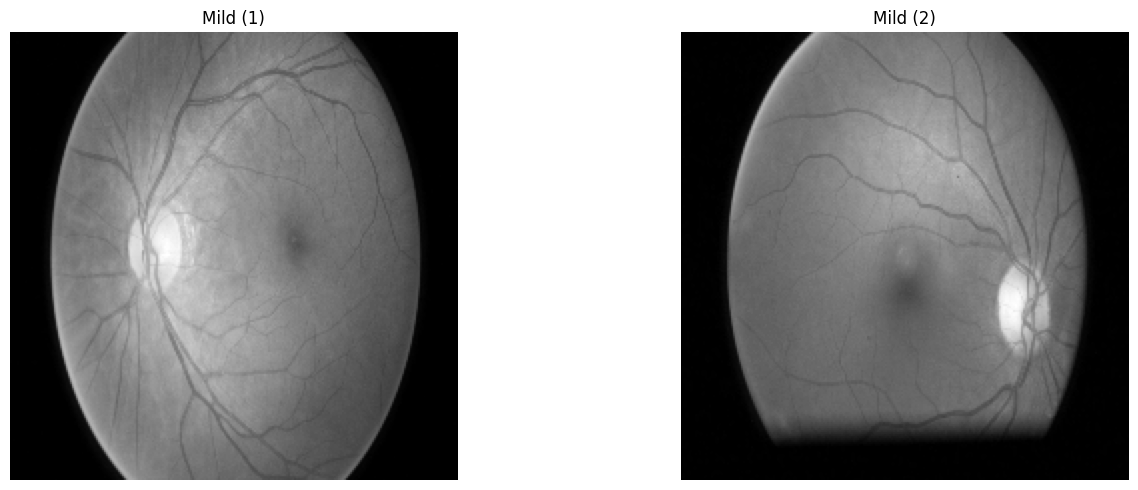

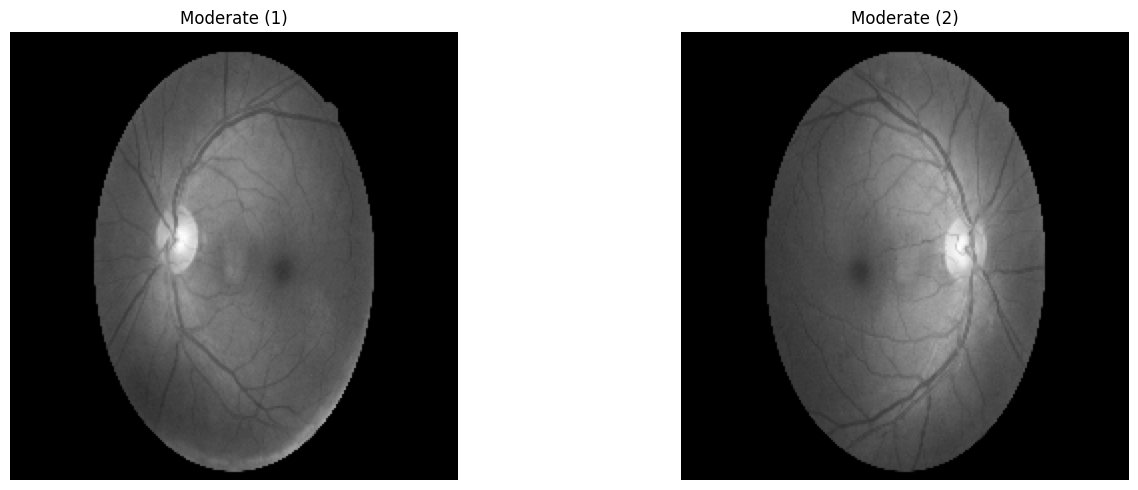

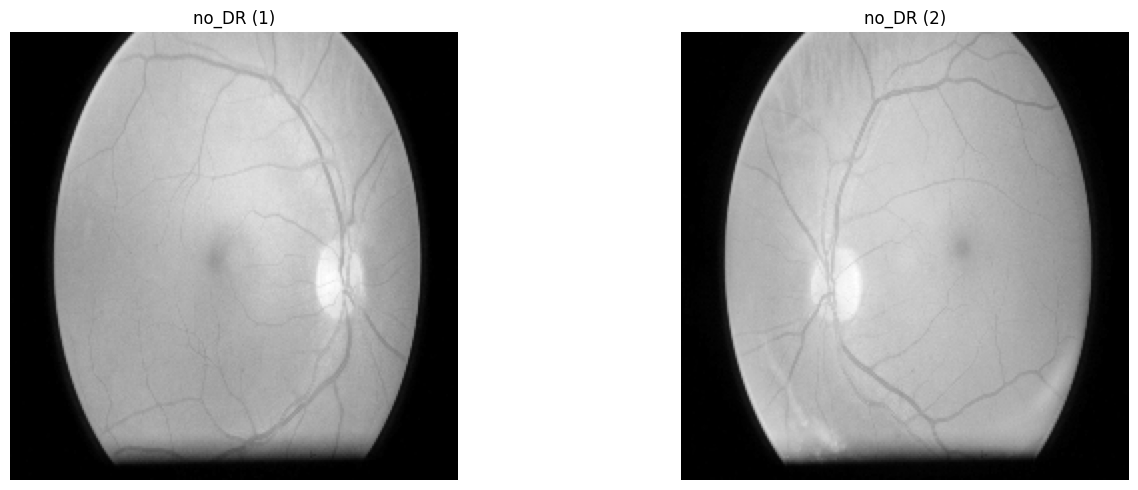

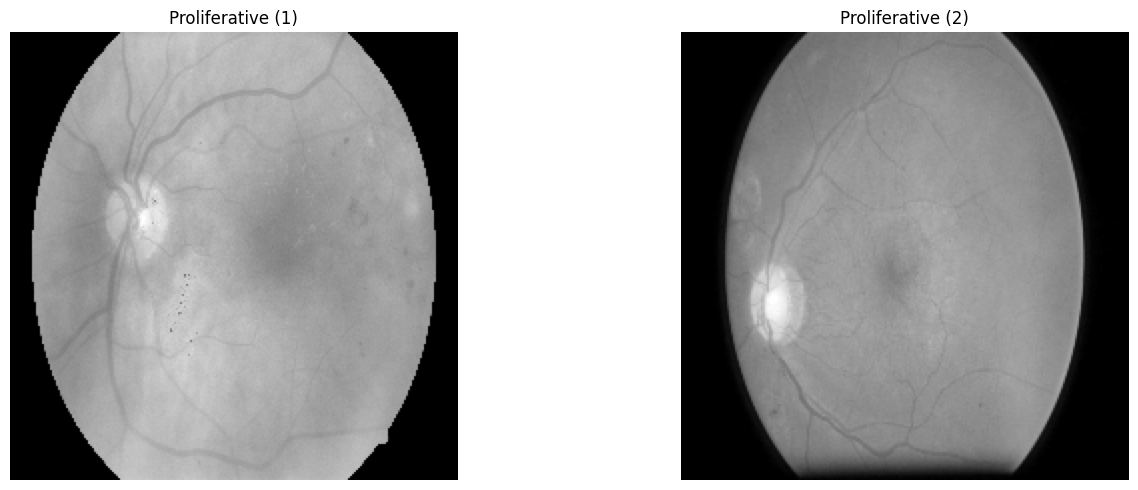

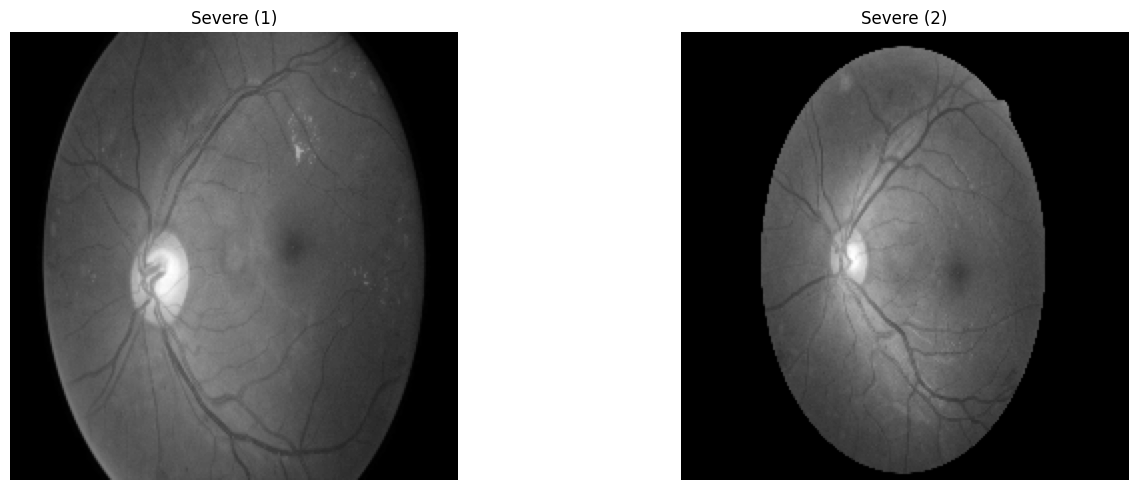

In [ ]:
# Ukuran gambar yang diinginkan
IMAGE_SIZE = (224, 224)

# Import the OpenCV library
import cv2

# Fungsi untuk menampilkan gambar grayscale dari suatu direktori
def show_grayscale_images(directory, class_name):
    image_paths = [os.path.join(directory, file) for file in os.listdir(directory)[:2]]  # Mengambil 5 gambar pertama dari direktori

    fig, axs = plt.subplots(1, len(image_paths), figsize=(15, 5))

    for i, image_path in enumerate(image_paths):
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, IMAGE_SIZE)  # Mengubah ukuran gambar
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        axs[i].imshow(gray_image, cmap='gray')
        axs[i].set_title(f"{class_name} ({i+1})")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Menampilkan gambar grayscale dari setiap kelas
show_grayscale_images(mild_dir, "Mild")
show_grayscale_images(moderate_dir, "Moderate")
show_grayscale_images(no_DR_dir, "no_DR")
show_grayscale_images(proliferative_dir, "Proliferative")
show_grayscale_images(severe_dir, "Severe")

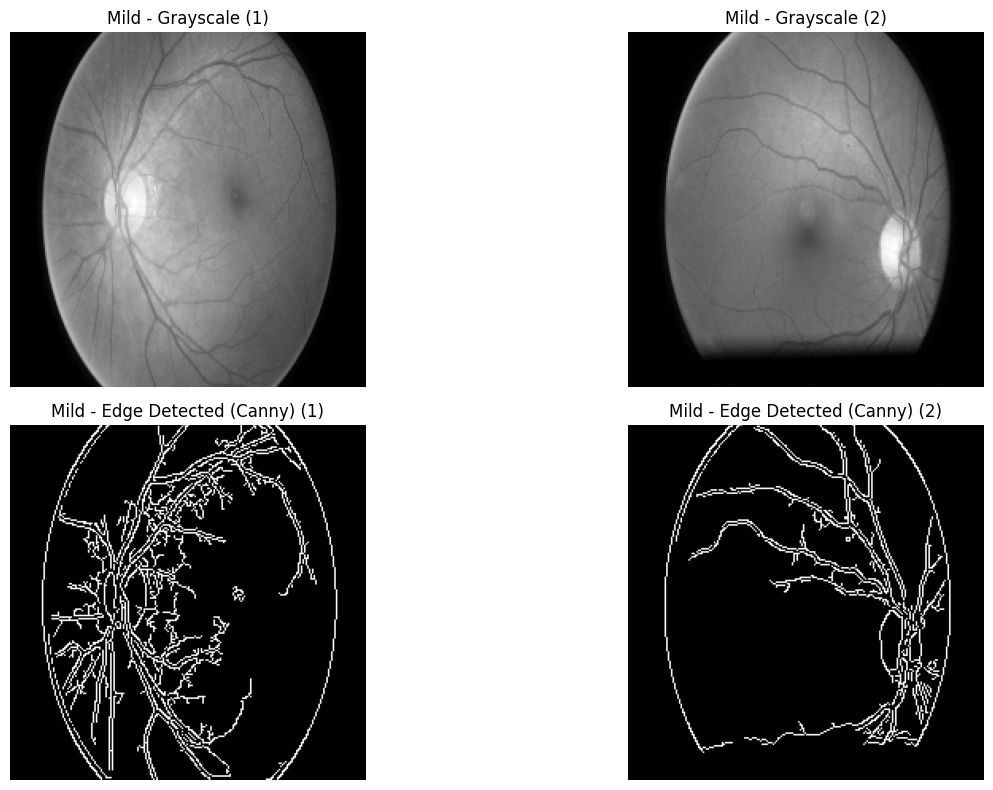

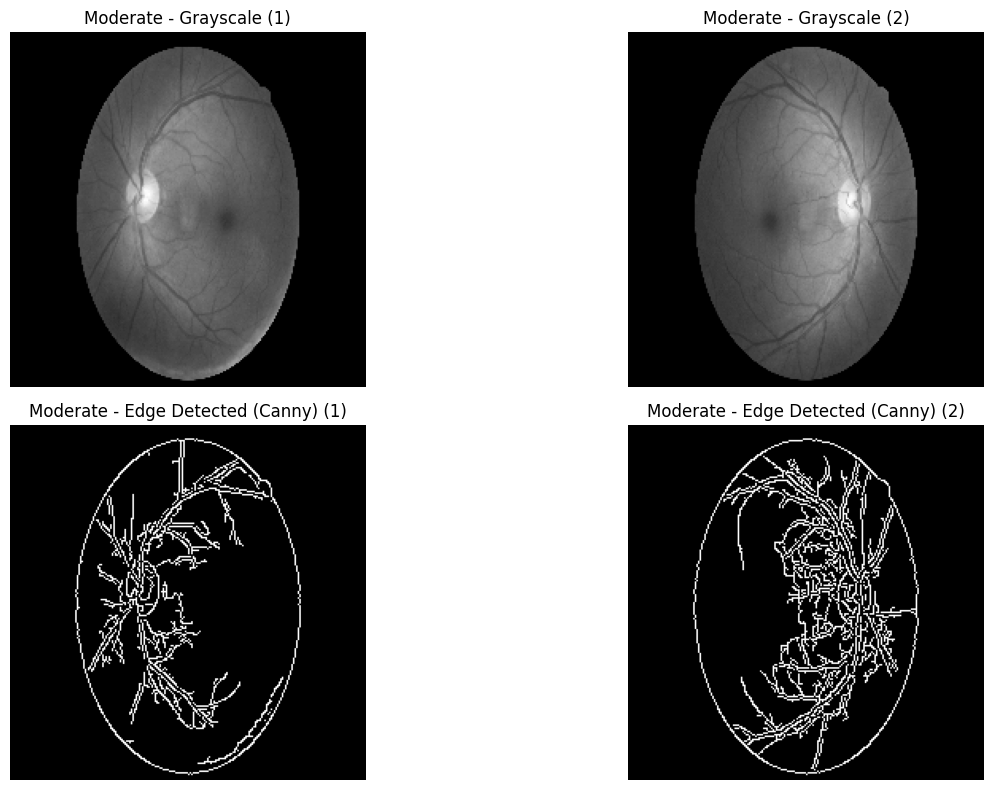

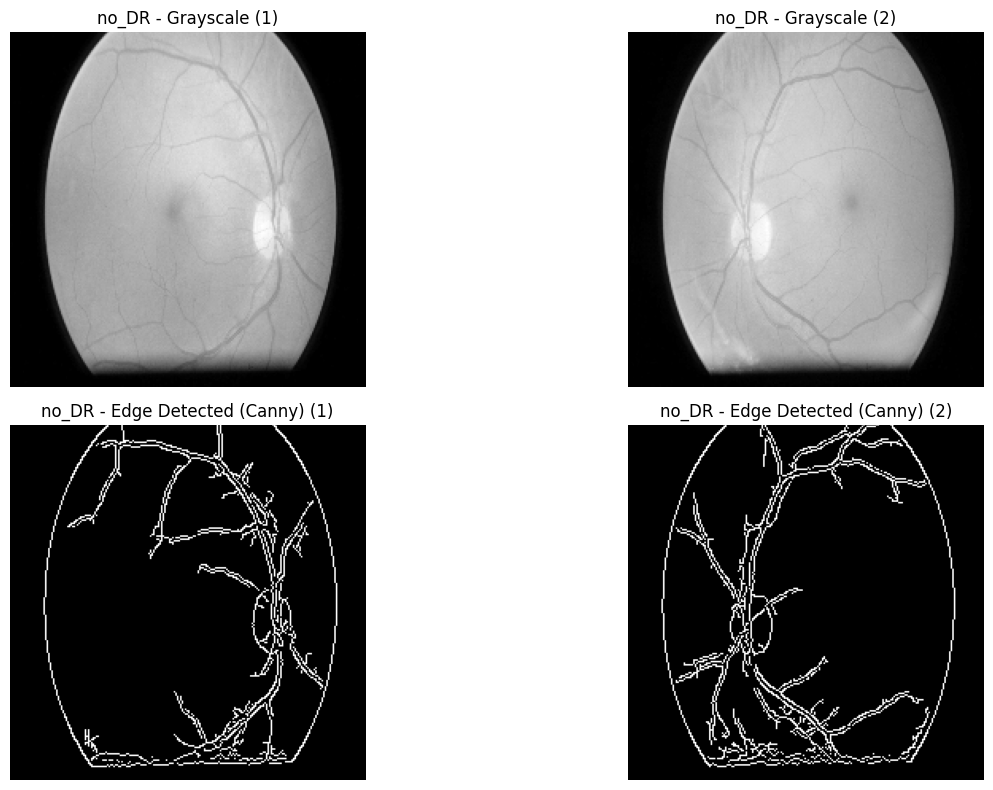

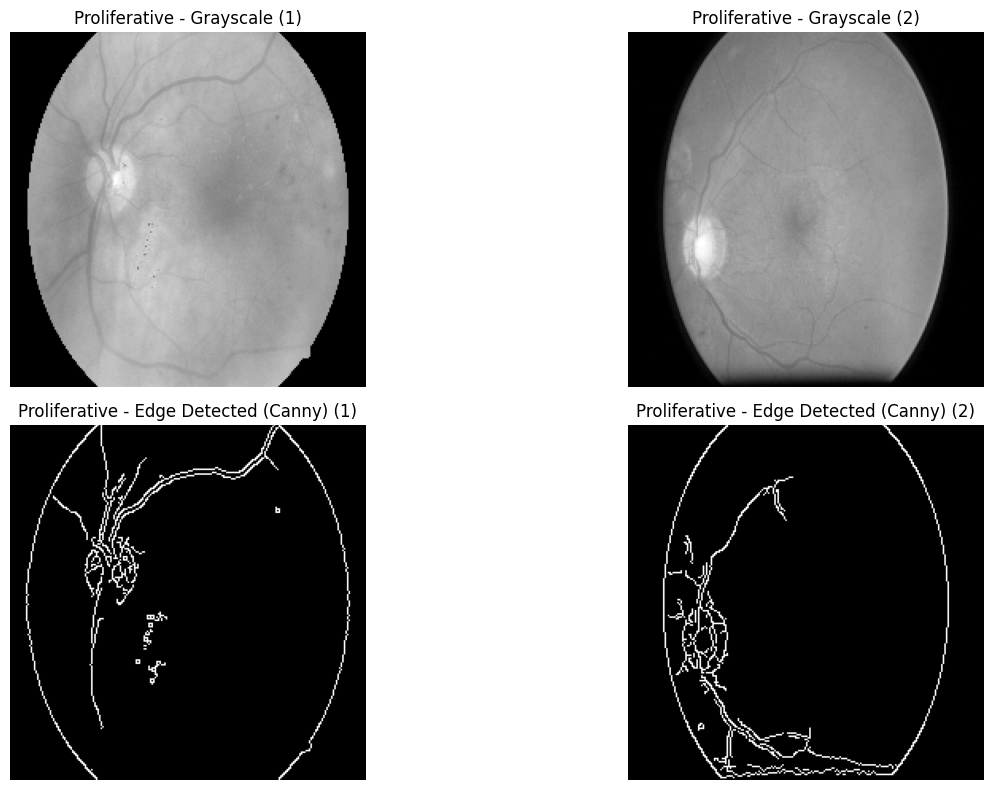

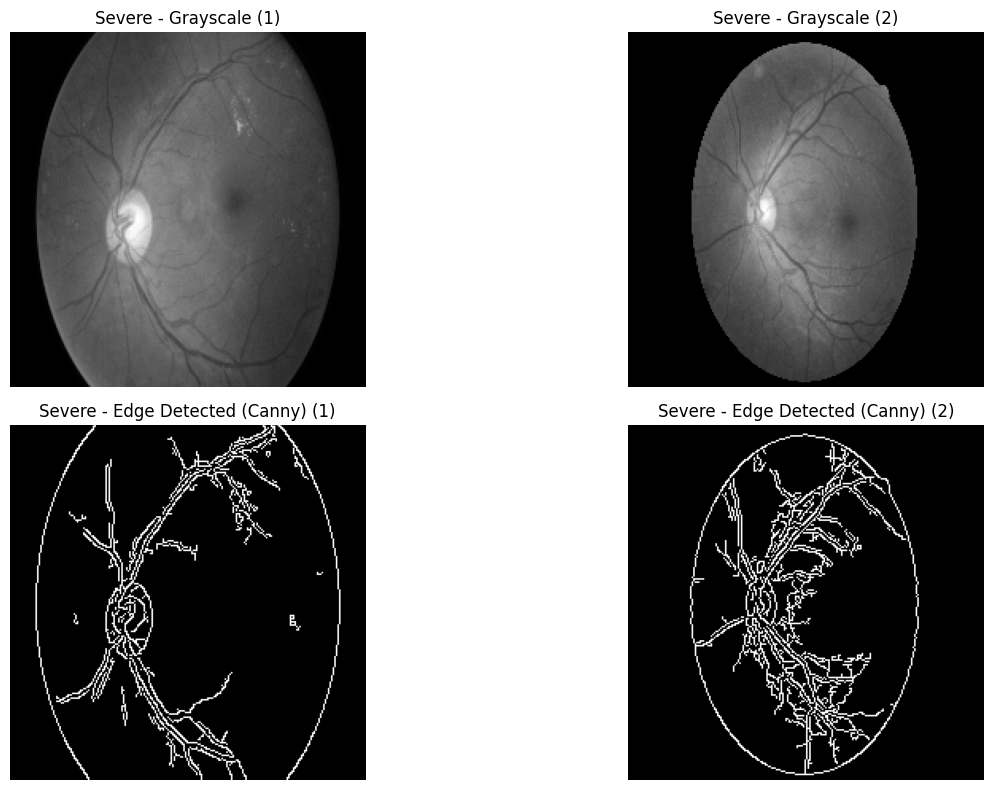

In [ ]:
# Ukuran gambar yang diinginkan
IMAGE_SIZE = (224, 224)

# Fungsi untuk deteksi tepi menggunakan operator Canny
def edge_detection_canny(image):
    """
    Melakukan deteksi tepi menggunakan operator Canny pada gambar grayscale.

    Args:
        image: Gambar grayscale dalam bentuk NumPy array.

    Returns:
        edge_detected_image: Gambar hasil deteksi tepi dalam bentuk NumPy array.
    """
    # Menentukan batas bawah dan atas untuk deteksi tepi adaptif
    lower_threshold = 30
    upper_threshold = 100

    # Menggunakan fungsi Canny dari OpenCV untuk deteksi tepi
    edge_detected_image = cv2.Canny(image, lower_threshold, upper_threshold)

    return edge_detected_image

# Fungsi untuk menampilkan gambar grayscale beserta hasil deteksi tepi menggunakan Canny
def show_grayscale_images_with_edges(directory, class_name):
    """
    Menampilkan gambar grayscale dari lima gambar pertama dalam direktori,
    serta hasil deteksi tepi menggunakan operator Canny.

    Args:
        directory (str): Path ke direktori yang berisi gambar.
        class_name (str): Nama kelas untuk ditampilkan di judul gambar.

    Returns:
        None
    """
    # Mengambil 4 gambar pertama dari direktori
    image_paths = [os.path.join(directory, file) for file in os.listdir(directory)[:2]]

    # Membuat subplot untuk menampilkan gambar
    fig, axs = plt.subplots(2, len(image_paths), figsize=(15, 8))

    for i, image_path in enumerate(image_paths):
        # Memuat dan mengubah ukuran gambar
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, IMAGE_SIZE)  # Mengubah ukuran gambar
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Deteksi tepi menggunakan operator Canny
        edge_detected_image = edge_detection_canny(gray_image)

        # Menampilkan gambar grayscale
        axs[0, i].imshow(gray_image, cmap='gray')
        axs[0, i].set_title(f"{class_name} - Grayscale ({i+1})")
        axs[0, i].axis('off')

        # Menampilkan hasil deteksi tepi
        axs[1, i].imshow(edge_detected_image, cmap='gray')
        axs[1, i].set_title(f"{class_name} - Edge Detected (Canny) ({i+1})")
        axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Menampilkan gambar grayscale dan hasil deteksi tepi menggunakan Canny dari setiap kelas
show_grayscale_images_with_edges(mild_dir, "Mild")
show_grayscale_images_with_edges(moderate_dir, "Moderate")
show_grayscale_images_with_edges(no_DR_dir, "no_DR")
show_grayscale_images_with_edges(proliferative_dir, "Proliferative")
show_grayscale_images_with_edges(severe_dir, "Severe")


In [ ]:
#Direktori isi latih
train_mild = os.path.join(train_dir, 'mild/')
train_moderate = os.path.join(train_dir, 'moderate/')
train_no_DR = os.path.join(train_dir, 'no_DR/')
train_proliferative = os.path.join(train_dir, 'proliferative/')
train_severe = os.path.join(train_dir, 'severe/')

#Direktori isi uji
validation_mild = os.path.join(validation_dir, 'mild/')
validation_moderate = os.path.join(validation_dir, 'moderate/')
validation_no_DR = os.path.join(validation_dir, 'no_DR/')
validation_proliferative = os.path.join(validation_dir, 'proliferative/')
validation_severe = os.path.join(validation_dir, 'severe/')


In [ ]:
# import os
# import random
# from shutil import copyfile

# def train_val_split(source, train, val, train_ratio, val_ratio):
#     # Load list of files in source directory
#     file_list = os.listdir(source)
#     total_size = len(file_list)

#     # Calculate sizes for train and validation split
#     train_size = int(train_ratio * total_size)
#     val_size = int(val_ratio * total_size)

#     # Sample files for train and validation split
#     randomized = random.sample(file_list, total_size)
#     train_files = randomized[0:train_size]
#     val_files = randomized[train_size:train_size + val_size]

#     # Create directories if they don't exist
#     os.makedirs(train, exist_ok=True)
#     os.makedirs(val, exist_ok=True)

#     # Copy files to train and val directories
#     for file_name in train_files:
#         source_file = os.path.join(source, file_name)
#         destination = os.path.join(train, file_name)
#         copyfile(source_file, destination)

#     for file_name in val_files:
#         source_file = os.path.join(source, file_name)
#         destination = os.path.join(val, file_name)
#         copyfile(source_file, destination)

# # Rasio data
# train_ratio = 0.7
# val_ratio = 0.3

# # Pembagian data untuk setiap kelas
# source_00 = mild_dir
# train_00 = train_mild
# val_00 = validation_mild
# train_val_split(source_00, train_00, val_00, train_ratio, val_ratio)

# source_01 = moderate_dir
# train_01 = train_moderate
# val_01 = validation_moderate
# train_val_split(source_01, train_01, val_01, train_ratio, val_ratio)

# source_02 = no_DR_dir
# train_02 = train_no_DR
# val_02 = validation_no_DR
# train_val_split(source_02, train_02, val_02, train_ratio, val_ratio)

# source_03 = proliferative_dir
# train_03 = train_proliferative
# val_03 = validation_proliferative
# train_val_split(source_03, train_03, val_03, train_ratio, val_ratio)

# source_04 = severe_dir
# train_04 = train_severe
# val_04 = validation_severe
# train_val_split(source_04, train_04, val_04, train_ratio, val_ratio)


In [ ]:
print('Jumlah Train  mild                = ', len(os.listdir(train_mild)))
print('Jumlah Train  moderate            = ', len(os.listdir(train_moderate)))
print('Jumlah Train  no_DR               = ', len(os.listdir(train_no_DR)))
print('Jumlah Train proliferative        = ', len(os.listdir(train_proliferative)))
print('Jumlah Train severe               = ', len(os.listdir(train_severe)))
print('=======================================================================================')
print('Jumlah validasi  mild             = ', len(os.listdir(validation_mild)))
print('Jumlah validasi  moderate         = ', len(os.listdir(validation_moderate)))
print('Jumlah validasi  no_DR            = ', len(os.listdir(validation_no_DR)))
print('Jumlah validasi proliferative     = ', len(os.listdir(validation_proliferative)))
print('Jumlah validasi severe            = ', len(os.listdir(validation_severe)))

Jumlah Train  mild                =  420
Jumlah Train  moderate            =  420
Jumlah Train  no_DR               =  420
Jumlah Train proliferative        =  420
Jumlah Train severe               =  420
Jumlah validasi  mild             =  180
Jumlah validasi  moderate         =  180
Jumlah validasi  no_DR            =  180
Jumlah validasi proliferative     =  180
Jumlah validasi severe            =  180


In [ ]:
!pip install tensorflow

import tensorflow as tf # Import TensorFlow
from tensorflow.keras.applications import VGG19 # Import VGG19 class

# Download pre-trained model VGG19
vgg = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='max',
    classes=1000,
    classifier_activation="softmax",
)
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [ ]:
#Buat parameter sebelumnya tidak dilatih lagi
for layer in vgg.layers:
  layer.trainable = False
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout

# Mengambil output dari layer sebelum layer prediksi 1000
x = vgg.layers[-2].output

x = Dropout(0.8)(x) # Tambahkan layer dropout dengan rate=0.8
# Membuat layer prediksi baru dengan 5 unit dan nama 'prediksi'
predictions = Dense(5, activation='softmax', name='prediksi')(x)

# Membuat model baru
model = Model(inputs=vgg.input, outputs=predictions)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
from keras import optimizers
import tensorflow as tf

# Definisikan metrik F1
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

# Inisialisasi optimizer menggunakan SGD
sgd = optimizers.SGD()

# Kompilasi model menggunakan SGD sebagai optimizer
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=[
                  'accuracy',
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),
                  F1Score(name='f1_score')
              ])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=(0.5, 1.5)
)


In [ ]:
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=(0.5, 1.5)
)


In [ ]:

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 2100 images belonging to 5 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 900 images belonging to 5 classes.


In [ ]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='E100.keras',
                             verbose=1, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

history = model.fit(
    train_set,
    epochs=100,
    validation_data=val_set,
    callbacks=callbacks,
    verbose=2)

duration = datetime.now() - start
print("Waktu Latih : ", duration)



Epoch 1/100

Epoch 1: val_loss improved from inf to 0.58335, saving model to E100.keras
66/66 - 713s - loss: 0.9914 - accuracy: 0.2262 - precision: 0.2329 - recall: 0.2062 - f1_score: 0.2187 - val_loss: 0.5833 - val_accuracy: 0.3111 - val_precision: 0.3981 - val_recall: 0.1822 - val_f1_score: 0.2500 - 713s/epoch - 11s/step
Epoch 2/100

Epoch 2: val_loss improved from 0.58335 to 0.55374, saving model to E100.keras
66/66 - 49s - loss: 0.8507 - accuracy: 0.2410 - precision: 0.2482 - recall: 0.2167 - f1_score: 0.2314 - val_loss: 0.5537 - val_accuracy: 0.3344 - val_precision: 0.3952 - val_recall: 0.1467 - val_f1_score: 0.2139 - 49s/epoch - 749ms/step
Epoch 3/100

Epoch 3: val_loss improved from 0.55374 to 0.55041, saving model to E100.keras
66/66 - 49s - loss: 0.7730 - accuracy: 0.2762 - precision: 0.2843 - recall: 0.2400 - f1_score: 0.2603 - val_loss: 0.5504 - val_accuracy: 0.3100 - val_precision: 0.3413 - val_recall: 0.2378 - val_f1_score: 0.2803 - 49s/epoch - 736ms/step
Epoch 4/100

Epoc

In [ ]:
# Evaluasi model pada data validasi
model.evaluate(val_set)


29/29 [==============================] - 16s 524ms/step - loss: 0.4894 - accuracy: 0.3611 - precision: 0.4341 - recall: 0.2489 - f1_score: 0.3164


[0.48943522572517395,
 0.3611111044883728,
 0.43410852551460266,
 0.24888889491558075,
 0.31638413667678833]

In [ ]:
# Evaluasi model pada data validasi
model.evaluate(train_set)

66/66 [==============================] - 34s 518ms/step - loss: 0.4708 - accuracy: 0.4005 - precision: 0.5093 - recall: 0.2881 - f1_score: 0.3680


[0.47080254554748535,
 0.4004761874675751,
 0.5092592835426331,
 0.28809523582458496,
 0.36800482869148254]

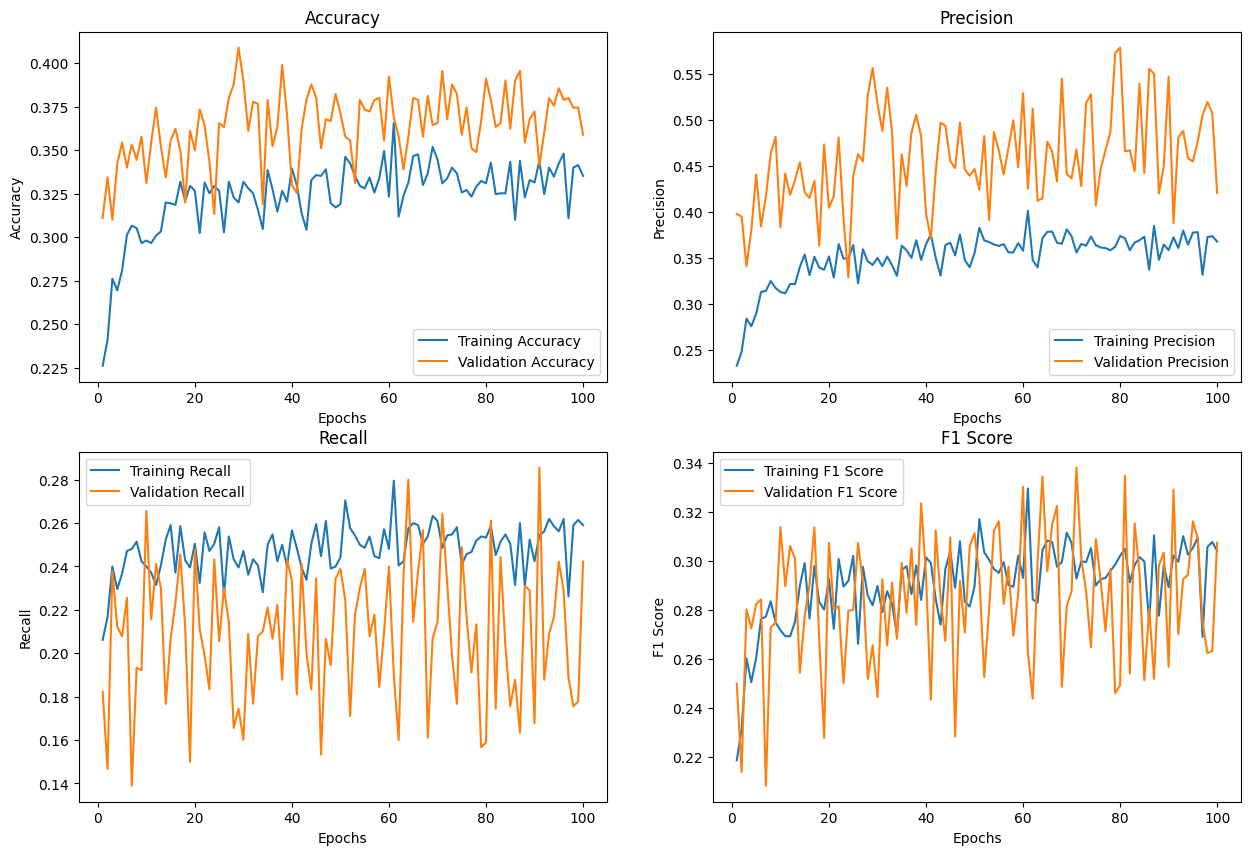

In [ ]:
import matplotlib.pyplot as plt

# Get the accuracy, precision, recall, and f1 score from the history dictionary
accuracy = history.history['accuracy']
precision = history.history['precision']
recall = history.history['recall']
f1_score = history.history['f1_score']

# Get the validation accuracy, precision, recall, and f1 score from the history dictionary
val_accuracy = history.history['val_accuracy']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']
val_f1_score = history.history['val_f1_score']

# Get the number of epochs
epochs = range(1, len(accuracy) + 1)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot the accuracy and validation accuracy on the first subplot
axs[0, 0].plot(epochs, accuracy, label='Training Accuracy')
axs[0, 0].plot(epochs, val_accuracy, label='Validation Accuracy')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Plot the precision and validation precision on the second subplot
axs[0, 1].plot(epochs, precision, label='Training Precision')
axs[0, 1].plot(epochs, val_precision, label='Validation Precision')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

# Plot the recall and validation recall on the third subplot
axs[1, 0].plot(epochs, recall, label='Training Recall')
axs[1, 0].plot(epochs, val_recall, label='Validation Recall')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# Plot the f1 score and validation f1 score on the fourth subplot
axs[1, 1].plot(epochs, f1_score, label='Training F1 Score')
axs[1, 1].plot(epochs, val_f1_score, label='Validation F1 Score')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].legend()

# Show the plot
plt.show()


29/29 [==============================] - 15s 502ms/step


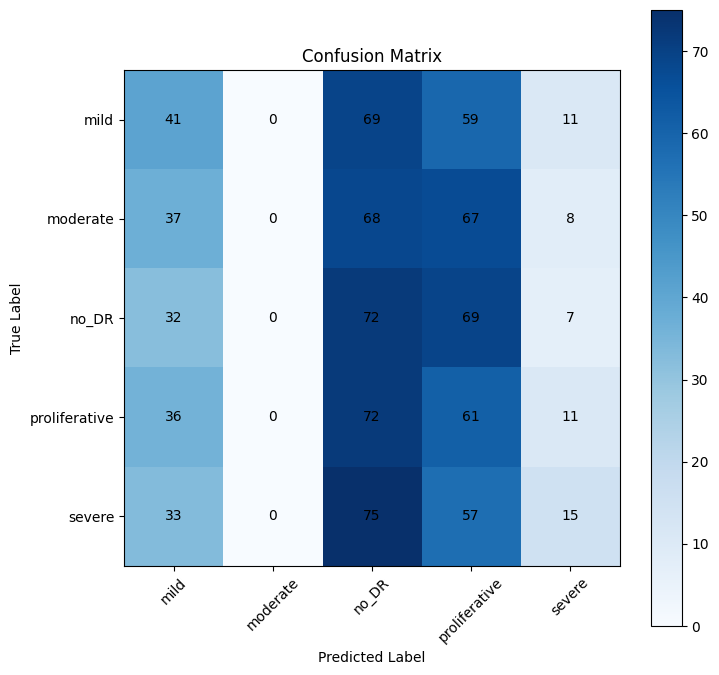

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the predictions from the model
predictions = model.predict(val_set)

# Get the true labels from the validation set
true_labels = val_set.classes

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define the class labels
class_labels = ['mild', 'moderate', 'no_DR', 'proliferative', 'severe']

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill the matrix with numbers
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
# Get the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define the class labels
class_labels = ['mild', 'moderate', 'no_DR', 'proliferative', 'severe']

# Create a table to display the confusion matrix
table = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Add the TP, TN, FP, and FN values to the table
table['TP'] = np.diag(cm)
table['TN'] = np.sum(cm) - np.diag(cm) - np.sum(cm, axis=1) + np.diag(cm)
table['FP'] = np.sum(cm, axis=0) - np.diag(cm)
table['FN'] = np.sum(cm, axis=1) - np.diag(cm)

# Display the table
print(table)


               mild  moderate  no_DR  proliferative  severe  TP   TN   FP   FN
mild             41         0     69             59      11  41  720  138  139
moderate         37         0     68             67       8   0  720    0  180
no_DR            32         0     72             69       7  72  720  284  108
proliferative    36         0     72             61      11  61  720  252  119
severe           33         0     75             57      15  15  720   37  165
